<a href="https://colab.research.google.com/github/FarhanFansuri/Tensorflow-repo/blob/alladin-persson/mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [9]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1,28*28).astype("float64")/255.0
x_test = x_test.reshape(-1,28*28).astype("float64")/255.0


In [10]:
model = keras.Sequential([
    keras.Input(shape=(28*28,)),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(216, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

In [11]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
  metrics=["accuracy"]
)

In [12]:
model.fit(x_train,y_train, batch_size=32, epochs=5, verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9075 - loss: 0.3092
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9754 - loss: 0.0770
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9826 - loss: 0.0528
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9872 - loss: 0.0389
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9910 - loss: 0.0282


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 216)                 │         110,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,544,696 (5.89 MB)

 Trainable params: 514,898 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,029,798 (3.93 MB)

In [13]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [16]:
predicted_classes = predictions.argmax(axis=1)

In [17]:
# Menampilkan prediksi dan label asli untuk sampel pertama
print("Predicted label:", predicted_classes[0])
print("True label:", y_test[0])

Predicted label: 7
True label: 7


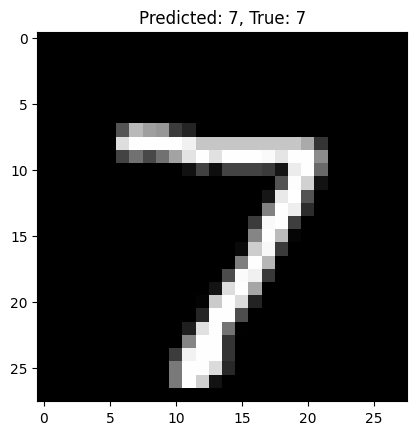

In [18]:
import matplotlib.pyplot as plt

# Menampilkan gambar pertama dari x_test dan prediksi
plt.imshow(x_test[0].reshape(28, 28), cmap="gray")
plt.title(f"Predicted: {predicted_classes[0]}, True: {y_test[0]}")
plt.show()
